How does "friendship" affect how often and when pairs interact?  

**Frequency of interaction** between mutual friends, one-way friends, and non-friends
- Looks like a normal distribution graph (assuming the data are normally distributed)
- x-axis is number of interactions
- y-axis is the frequency, how many pairs interact that much

**When there is interaction** between mutual friends, one-way friends, and non-friends
- Time-based graph
- x-axis is time of day
- y-axis is the total number of interactions at that point in time

In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import datetime

#%matplotlib notebook

In [29]:
def toDatetimeTimestamp(t): #takes timestamp from original file and turns it into datetime datetime object
    return datetime.datetime.fromtimestamp(time.mktime(time.gmtime(int(t) + 3600)))
    #timezone conversion is done when adding 3600 seconds (one hour)

In [2]:
from enum import Enum
class State(Enum):
    MIN = 0     #min of the students reported max as a friend
    MAX = 1     #max of the students reported min as a friend
    TWO = 2     #both are friends with each other
    NONE = 3

Creates master friendship_data dictionary from friendship data file.  Does not include non-friends.

In [4]:
friendship_data = {} #key is tuple (min, max), value is enum State. Only includes students in the file, so non-friendships aren't in this dictionary
with open("data/original/Friendship-network_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for id1, id2 in reader:
        student_key = (min(id1, id2), max(id1, id2))

        if student_key in friendship_data:
            if (friendship_data[student_key] == State.MIN and id1 < id2) or (friendship_data[student_key] == State.MAX and id1 > id2):
                print("duplicate data") #shouldn't print any duplicate data
            else:
                friendship_data[student_key] = State.TWO
        
        elif id1 < id2:
            friendship_data[student_key] = State.MIN
        else:
            friendship_data[student_key] = State.MAX

**Frequency of interaction** - histograms how much friends interact with each other

In [10]:
#key is friendship tuple, value is the number of timestamps they're in contact (aka interactions)
no_friend_interactions = {}
one_friend_interactions = {}
two_friends_interactions = {}

#ADDING KEYS ONLY and default value to 0.  not adding data to no_friend_interactions
for student_key in friendship_data.keys():
    if friendship_data[student_key] == State.TWO:
        two_friends_interactions[student_key] = 0
    else:
        one_friend_interactions[student_key] = 0

#COUNTING TIMESTAMPS
with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for t, id1, id2, cls1, cls2 in reader:
        student_key = (min(id1, id2), max(id1, id2))

        if student_key in two_friends_interactions:
            two_friends_interactions[student_key] += 1
        elif student_key in one_friend_interactions:
            one_friend_interactions[student_key] += 1
        elif student_key in no_friend_interactions:
            no_friend_interactions[student_key] += 1
        else:
            no_friend_interactions[student_key] = 1

In [21]:
print(len(no_friends_list), len(one_friend_list), len(two_friends_list))
#this means that most of the people who interact aren't friends.  And they interact for a long time

5470 144 262


**histograms**

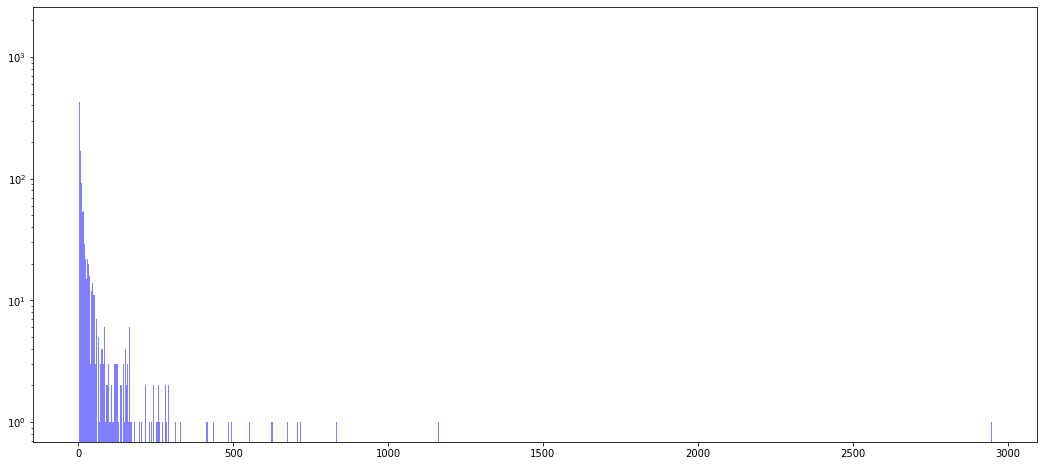

In [17]:
no_friends_list = list(no_friend_interactions.values()) #the number of times pairs that aren't friends interact
no_bins = max(no_friends_list)

figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
n, bins, patches = plt.hist(no_friends_list, no_bins, facecolor='blue', alpha=0.5, log=True)
plt.show()

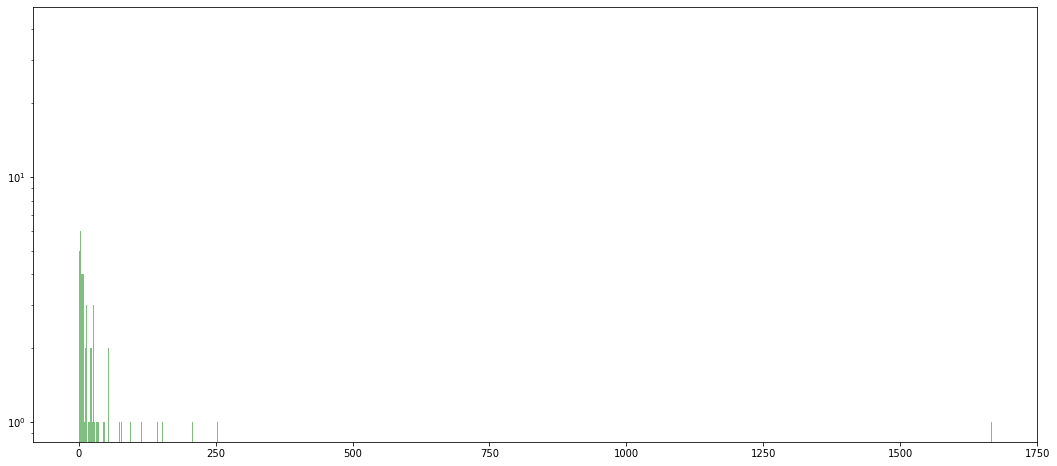

In [19]:
one_friend_list = list(one_friend_interactions.values()) #the number of times one-sided friends interact
one_bins = max(one_friend_list)

figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
n, bins, patches = plt.hist(one_friend_list, one_bins, facecolor='green', alpha=0.5, log=True)
plt.show()

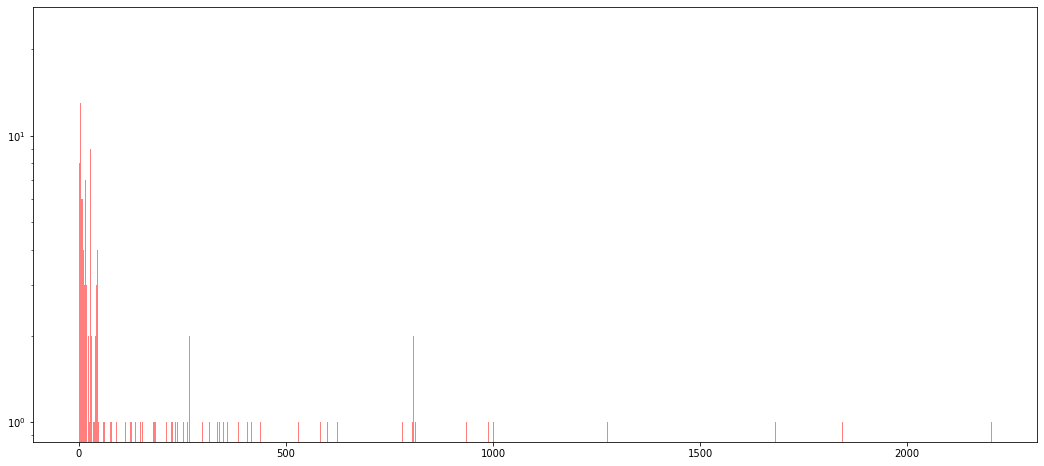

In [20]:
two_friends_list = list(two_friends_interactions.values()) #the number of times mutual friends interact
two_bins = max(one_friend_list)

figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
n, bins, patches = plt.hist(two_friends_list, two_bins, facecolor='red', alpha=0.5, log=True)
plt.show()

**When there is interaction** - graphs of when friends interact with each other throughout the day

In [31]:
#key is timestamp, value is number of pairs within the given friend category that interacted
no_friend_times = {}
one_friend_times = {}
two_friend_times = {}

with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for t, id1, id2, cls1, cls2 in reader:
        t = toDatetimeTimestamp(int(t))
        student_key = (min(id1, id2), max(id1, id2))

        if student_key in friendship_data:
            #adding to two_friend_times
            if friendship_data[student_key] == State.TWO:
                if t in two_friend_times:
                    two_friend_times[t] += 1
                else:
                    two_friend_times[t] = 1

            #adding to one_friend_times
            else:
                if t in one_friend_times:
                    one_friend_times[t] += 1
                else:
                    one_friend_times[t] = 1
                    
        #adding to no_friend_times
        elif t in no_friend_times:
            no_friend_times[t] += 1
        else:
            no_friend_times[t] = 1

**graphs**

<BarContainer object of 7375 artists>

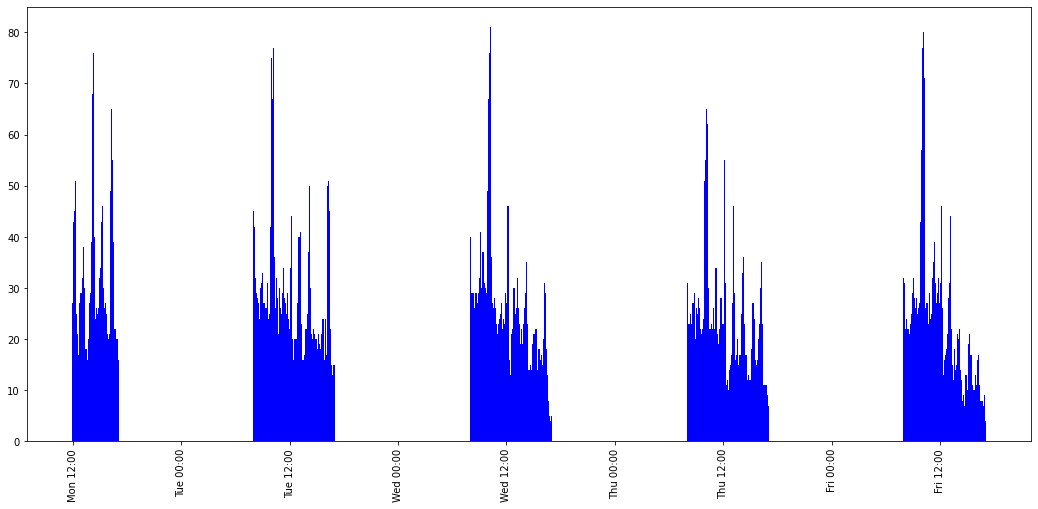

In [33]:
figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
plt.bar(list(no_friend_times.keys()), list(no_friend_times.values()), width=0.005, alpha=0.5, color="blue")

<BarContainer object of 3431 artists>

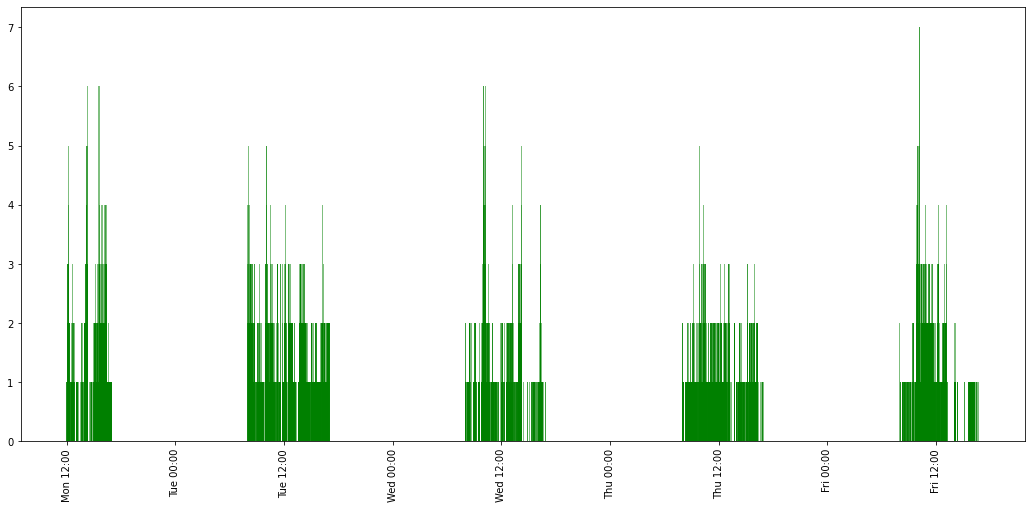

In [34]:
figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
plt.bar(list(one_friend_times.keys()), list(one_friend_times.values()), width=0.005, alpha=0.5, color="green")

<BarContainer object of 7128 artists>

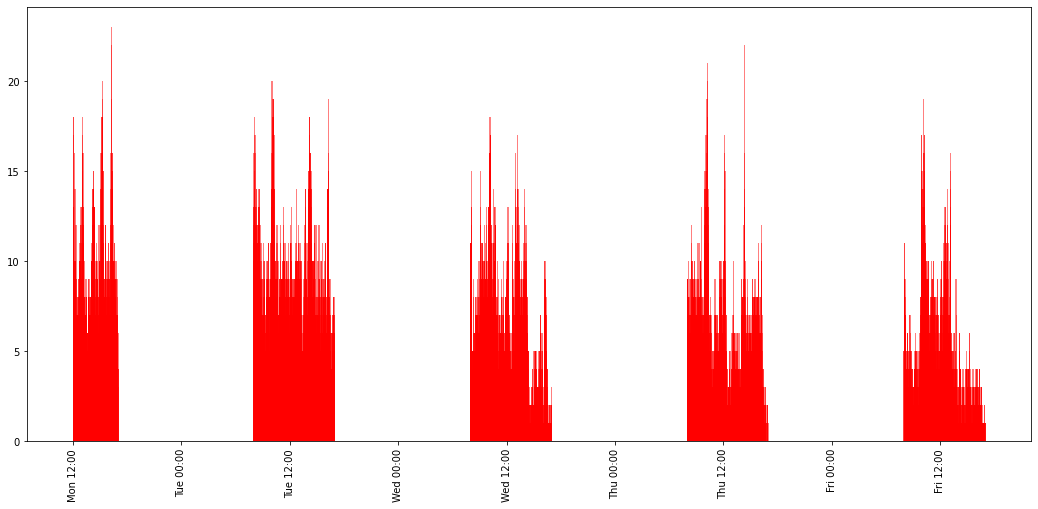

In [36]:
figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
plt.bar(list(two_friend_times.keys()), list(two_friend_times.values()), width=0.005, alpha=0.5, color="red")